In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
from xbbg import blp
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)  

In [315]:
comdtylist = ['CL1', 'HO1', 'XB1','NG1','GC1','SI1','HG1','C 1','S 1','BO1','CT1','KC1','SB1','W 1','LC1','LH1','KW1','SM1','PL1']

In [182]:
comdtylist2 = [commodity + ' Comdty' for commodity in comdtylist]

In [183]:
pricedf = pd.DataFrame()

In [184]:
for comdty in comdtylist2:
    cdf = blp.bdh(tickers=comdty, flds=['last_price'], start_date='1995-01-01', end_date='2024-01-24')
    cdf.index = pd.to_datetime(cdf.index)
    pricedf = pd.concat([pricedf, cdf],axis=1)

In [14]:
#cdf = blp.bdh(tickers='XB1 Comdty', flds=['last_price'], start_date='1995-01-01', end_date='2024-01-24')


In [15]:
#cdf

In [16]:
#testcdf = blp.bdh(tickers='NG1 Comdty', flds=['last_price'], start_date='1995-01-01', end_date='2024-01-24')

In [17]:
#testcdf.sample(20)

In [185]:
pricedf.sort_index()

,CL1 Comdty,HO1 Comdty,XB1 Comdty,NG1 Comdty,GC1 Comdty,SI1 Comdty,HG1 Comdty,C 1 Comdty,S 1 Comdty,BO1 Comdty,CT1 Comdty,KC1 Comdty,SB1 Comdty,W 1 Comdty,LC1 Comdty,LH1 Comdty,KW1 Comdty,SM1 Comdty,PL1 Comdty
,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price
1995-01-03,17.44,49.94,NaN,1.683,380.9,4.762,133.70,228.50,547.75,29.28,88.35,167.75,15.39,395.50,73.300,39.300,391.50,153.2,413.5
1995-01-04,17.48,49.64,NaN,1.617,375.3,4.635,132.70,228.75,548.50,29.28,90.12,168.00,15.61,398.00,73.250,38.200,394.75,153.9,402.0
1995-01-05,17.72,49.96,NaN,1.552,376.6,4.732,134.80,230.75,548.75,29.19,88.83,172.55,15.61,396.25,72.975,38.300,394.00,153.4,402.0
1995-01-06,17.67,49.52,NaN,1.499,372.2,4.652,136.30,231.75,549.00,28.78,88.58,174.95,15.74,394.50,72.850,37.200,390.50,153.7,407.5
1995-01-09,17.40,48.33,NaN,1.454,374.0,4.690,139.05,232.75,548.25,28.43,89.27,169.10,15.45,383.25,73.375,37.600,380.00,154.8,402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18,74.08,269.36,218.35,2.697,2021.6,22.807,374.50,444.00,1213.50,47.62,82.51,179.95,23.04,585.50,174.825,71.100,605.25,361.3,903.3
2024-01-19,73.41,266.21,216.28,2.519,2029.3,22.711,378.65,445.50,1213.25,46.90,83.95,185.15,23.57,593.25,174.375,70.750,608.00,356.5,897.3
2024-01-22,75.19,269.35,223.78,2.419,2022.2,22.296,376.35,445.75,1224.25,48.16,84.83,192.25,23.50,596.50,173.775,70.925,607.00,355.8,894.4


- Converting to weekly prices, with Monday as the last day of the week. 

- Addtionally, utlizing last price of Monday as the last price of the week. 

In [187]:
weeklydf = pricedf.resample('W-Mon').last()

In [188]:
weeklydf.head()

,CL1 Comdty,HO1 Comdty,XB1 Comdty,NG1 Comdty,GC1 Comdty,SI1 Comdty,HG1 Comdty,C 1 Comdty,S 1 Comdty,BO1 Comdty,CT1 Comdty,KC1 Comdty,SB1 Comdty,W 1 Comdty,LC1 Comdty,LH1 Comdty,KW1 Comdty,SM1 Comdty,PL1 Comdty
,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price,last_price
1995-01-09,17.40,48.33,NaN,1.454,374.0,4.690,139.05,232.75,548.25,28.43,89.27,169.10,15.45,383.25,73.375,37.600,380.0,154.8,402.0
1995-01-16,17.88,47.35,NaN,1.390,378.3,4.827,135.65,234.50,553.25,27.87,88.94,168.45,14.02,381.75,72.725,39.275,380.0,155.7,412.3
1995-01-23,18.10,47.82,NaN,1.389,381.4,4.820,140.35,233.00,552.75,26.68,91.53,169.55,14.93,374.75,74.850,40.825,376.5,158.9,413.6
1995-01-30,18.09,47.42,NaN,1.378,376.8,4.730,137.60,229.50,549.00,26.90,94.35,157.45,14.37,368.50,74.250,40.300,369.5,157.1,418.8
1995-02-06,18.59,49.20,NaN,1.538,376.3,4.705,131.80,235.75,550.50,26.68,91.92,153.90,13.74,369.75,73.800,39.100,374.0,155.0,412.5


- Converting Weekly Prices to log prices (to reduce the effects of exponential trends like inflation within this time series).
- Furthermore, to prepare the dataframe for backtesting, computing returns on each date from the previous date (week-by-week returns). This is performed with the .diff() method.

In [189]:
logreturns = np.log(weeklydf).diff()

C:\Users\MarkLee\anaconda_3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [225]:
logreturns2 = logreturns.copy()

Renaming column names and removing multilevelindex for column names

In [226]:
logreturns2.columns = comdtylist

In [242]:
logreturns2.shape

(1517, 19)

In [21]:
cwd = os.getcwd()

In [22]:
os.listdir(cwd)

['.ipynb_checkpoints',
 'Cattle.csv',
 'CLWTIPhys.csv',
 'Coffee.csv',
 'Copper.csv',
 'Corn.csv',
 'COT Other',
 'Cotton.csv',
 'Gold.csv',
 'HeatOIl.csv',
 'Hog.csv',
 'NatGas.csv',
 'Platinum.csv',
 'RBOB.csv',
 'Silver.csv',
 'Soybean.csv',
 'SoybeanMeal.csv',
 'SoybeanOil.csv',
 'Sugar.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'VHP BackTest.ipynb',
 'WheatHRW.csv',
 'WheatSRW.csv']

In [23]:
files = [file for file in os.listdir(cwd) if file.endswith('.csv')]

In [24]:
combined_df = pd.DataFrame()

In [25]:
for file in files:
    df = pd.read_csv(file)
    df.rename(columns={'Report_Date_as_YYYY_MM_DD': 'ReportDate'}, inplace=True)
    df.ReportDate = pd.to_datetime(df.ReportDate.str.split().str[0])
    df.set_index('ReportDate', inplace=True)
    combined_df = pd.concat([combined_df, df])

In [26]:
combined_df.head()

,ID,Market_and_Exchange_Names,YYYY Report Week WW,CONTRACT_MARKET_NAME,CFTC_Contract_Market_Code,CFTC_Market_Code,CFTC_Region_Code,CFTC_Commodity_Code,Commodity Name,Open_Interest_All,NonComm_Positions_Long_All,NonComm_Positions_Short_All,NonComm_Postions_Spread_All,Comm_Positions_Long_All,Comm_Positions_Short_All,Tot_Rept_Positions_Long_All,Tot_Rept_Positions_Short_All,NonRept_Positions_Long_All,NonRept_Positions_Short_All,Open_Interest_Old,NonComm_Positions_Long_Old,NonComm_Positions_Short_Old,NonComm_Positions_Spread_Old,Comm_Positions_Long_Old,Comm_Positions_Short_Old,Tot_Rept_Positions_Long_Old,Tot_Rept_Positions_Short_Old,NonRept_Positions_Long_Old,NonRept_Positions_Short_Old,Open_Interest_Other,NonComm_Positions_Long_Other,NonComm_Positions_Short_Other,NonComm_Positions_Spread_Other,Comm_Positions_Long_Other,Comm_Positions_Short_Other,Tot_Rept_Positions_Long_Other,Tot_Rept_Positions_Short_Other,NonRept_Positions_Long_Other,NonRept_Positions_Short_Other,Change_in_Open_Interest_All,Change_in_NonComm_Long_All,Change_in_NonComm_Short_All,Change_in_NonComm_Spead_All,Change_in_Comm_Long_All,Change_in_Comm_Short_All,Change_in_Tot_Rept_Long_All,Change_in_Tot_Rept_Short_All,Change_in_NonRept_Long_All,Change_in_NonRept_Short_All,Pct_of_Open_Interest_All,Pct_of_OI_NonComm_Long_All,Pct_of_OI_NonComm_Short_All,Pct_of_OI_NonComm_Spread_All,Pct_of_OI_Comm_Long_All,Pct_of_OI_Comm_Short_All,Pct_of_OI_Tot_Rept_Long_All,Pct_of_OI_Tot_Rept_Short_All,Pct_of_OI_NonRept_Long_All,Pct_of_OI_NonRept_Short_All,Pct_of_Open_Interest_Old,Pct_of_OI_NonComm_Long_Old,Pct_of_OI_NonComm_Short_Old,Pct_of_OI_NonComm_Spread_Old,Pct_of_OI_Comm_Long_Old,Pct_of_OI_Comm_Short_Old,Pct_of_OI_Tot_Rept_Long_Old,Pct_of_OI_Tot_Rept_Short_Old,Pct_of_OI_NonRept_Long_Old,Pct_of_OI_NonRept_Short_Old,Pct_of_Open_Interest_Other,Pct_of_OI_NonComm_Long_Other,Pct_of_OI_NonComm_Short_Other,Pct_of_OI_NonComm_Spread_Other,Pct_of_OI_Comm_Long_Other,Pct_of_OI_Comm_Short_Other,Pct_of_OI_Tot_Rept_Long_Other,Pct_of_OI_Tot_Rept_Short_Other,Pct_of_OI_NonRept_Long_Other,Pct_of_OI_NonRept_Short_Other,Traders_Tot_All,Traders_NonComm_Long_All,Traders_NonComm_Short_All,Traders_NonComm_Spread_All,Traders_Comm_Long_All,Traders_Comm_Short_All,Traders_Tot_Rept_Long_All,Traders_Tot_Rept_Short_All,Traders_Tot_Old,Traders_NonComm_Long_Old,Traders_NonComm_Short_Old,Traders_NonComm_Spead_Old,Traders_Comm_Long_Old,Traders_Comm_Short_Old,Traders_Tot_Rept_Long_Old,Traders_Tot_Rept_Short_Old,Traders_Tot_Other,Traders_NonComm_Long_Other,Traders_NonComm_Short_Other,Traders_NonComm_Spread_Other,Traders_Comm_Long_Other,Traders_Comm_Short_Other,Traders_Tot_Rept_Long_Other,Traders_Tot_Rept_Short_Other,Conc_Gross_LE_4_TDR_Long_All,Conc_Gross_LE_4_TDR_Short_All,Conc_Gross_LE_8_TDR_Long_All,Conc_Gross_LE_8_TDR_Short_All,Conc_Net_LE_4_TDR_Long_All,Conc_Net_LE_4_TDR_Short_All,Conc_Net_LE_8_TDR_Long_All,Conc_Net_LE_8_TDR_Short_All,Conc_Gross_LE_4_TDR_Long_Old,Conc_Gross_LE_4_TDR_Short_Old,Conc_Gross_LE_8_TDR_Long_Old,Conc_Gross_LE_8_TDR_Short_Old,Conc_Net_LE_4_TDR_Long_Old,Conc_Net_LE_4_TDR_Short_Old,Conc_Net_LE_8_TDR_Long_Old,Conc_Net_LE_8_TDR_Short_Old,Conc_Gross_LE_4_TDR_Long_Other,Conc_Gross_LE_4_TDR_Short_Other,Conc_Gross_LE_8_TDR_Long_Other,Conc_Gross_LE_8_TDR_Short_Other,Conc_Net_LE_4_TDR_Long_Other,Conc_Net_LE_4_TDR_Short_Other,Conc_Net_LE_8_TDR_Long_Other,Conc_Net_LE_8_TDR_Short_Other,Contract_Units,COMMODITY_NAME,COMMODITY_SUBGROUP_NAME,COMMODITY_GROUP_NAME,FutOnly_or_Combined
ReportDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-09-13,220913057642C,LIVE CATTLE - CHICAGO MERCANTILE EXCHANGE,2022 Report Week 37,LIVE CATTLE,57642,CME,CHI,57,LIVE CATTLE,364252,117234,28266,99090,110525,190279,326848,317635,37404,46617,364252,117234,28266,99090,110525,190279,326848,317635,37404,46617,0,0,0,0,0,0,0,0,0,0,3390.0,5092.0,-1262.0,-4122.0,2114.0,5659.0,3083.0,274.0,307.0,3115.0,100,32.2,7.8,27.2,30.3,52.2,89.7,87.2,10.3,12

In [27]:
dfcols = combined_df[['CFTC_Contract_Market_Code', 'Commodity Name','Open_Interest_All',
 'NonComm_Positions_Long_All',
 'NonComm_Positions_Short_All',
 'NonComm_Postions_Spread_All',
 'Comm_Positions_Long_All',
 'Comm_Positions_Short_All',
 'Tot_Rept_Positions_Long_All',
 'Tot_Rept_Positions_Short_All',
 'NonRept_Positions_Long_All',
 'NonRept_Positions_Short_All','Change_in_Open_Interest_All',
 'Change_in_NonComm_Long_All',
 'Change_in_NonComm_Short_All',
 'Change_in_NonComm_Spead_All',
 'Change_in_Comm_Long_All',
 'Change_in_Comm_Short_All',
 'Change_in_Tot_Rept_Long_All',
 'Change_in_Tot_Rept_Short_All',
 'Change_in_NonRept_Long_All',
 'Change_in_NonRept_Short_All','Pct_of_Open_Interest_All',
 'Pct_of_OI_NonComm_Long_All',
 'Pct_of_OI_NonComm_Short_All',
 'Pct_of_OI_NonComm_Spread_All',
 'Pct_of_OI_Comm_Long_All',
 'Pct_of_OI_Comm_Short_All',
 'Pct_of_OI_Tot_Rept_Long_All',
 'Pct_of_OI_Tot_Rept_Short_All',
 'Pct_of_OI_NonRept_Long_All',
 'Pct_of_OI_NonRept_Short_All','Conc_Gross_LE_4_TDR_Long_All',
 'Conc_Gross_LE_4_TDR_Short_All',
 'Conc_Gross_LE_8_TDR_Long_All',
 'Conc_Gross_LE_8_TDR_Short_All']]

In [28]:
dfcols.loc[dfcols['CFTC_Contract_Market_Code'] == 1602, 'Commodity Name'] = 'WheatSRW'

In [29]:
dfcols.loc[dfcols['CFTC_Contract_Market_Code'] == 1612, 'Commodity Name'] = 'WheatHRW'

In [30]:
dfcols.head()

,CFTC_Contract_Market_Code,Commodity Name,Open_Interest_All,NonComm_Positions_Long_All,NonComm_Positions_Short_All,NonComm_Postions_Spread_All,Comm_Positions_Long_All,Comm_Positions_Short_All,Tot_Rept_Positions_Long_All,Tot_Rept_Positions_Short_All,NonRept_Positions_Long_All,NonRept_Positions_Short_All,Change_in_Open_Interest_All,Change_in_NonComm_Long_All,Change_in_NonComm_Short_All,Change_in_NonComm_Spead_All,Change_in_Comm_Long_All,Change_in_Comm_Short_All,Change_in_Tot_Rept_Long_All,Change_in_Tot_Rept_Short_All,Change_in_NonRept_Long_All,Change_in_NonRept_Short_All,Pct_of_Open_Interest_All,Pct_of_OI_NonComm_Long_All,Pct_of_OI_NonComm_Short_All,Pct_of_OI_NonComm_Spread_All,Pct_of_OI_Comm_Long_All,Pct_of_OI_Comm_Short_All,Pct_of_OI_Tot_Rept_Long_All,Pct_of_OI_Tot_Rept_Short_All,Pct_of_OI_NonRept_Long_All,Pct_of_OI_NonRept_Short_All,Conc_Gross_LE_4_TDR_Long_All,Conc_Gross_LE_4_TDR_Short_All,Conc_Gross_LE_8_TDR_Long_All,Conc_Gross_LE_8_TDR_Short_All
ReportDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-09-13,57642,LIVE CATTLE,364252,117234,28266,99090,110525,190279,326848,317635,37404,46617,3390.0,5092.0,-1262.0,-4122.0,2114.0,5659.0,3083.0,274.0,307.0,3115.0,100,32.2,7.8,27.2,30.3,52.2,89.7,87.2,10.3,12.8,12.9,17.3,21.4,26.9
2022-09-20,57642,LIVE CATTLE,367904,122375,28717,97982,109380,193597,329737,320296,38166,47608,3652.0,5142.0,451.0,-1108.0,-1145.0,3317.0,2889.0,2661.0,763.0,991.0,100,33.3,7.8,26.6,29.7,52.6,89.6,87.1,10.4,12.9,13.2,17.2,22.1,26.9
2022-09-27,57642,LIVE CATTLE,359048,113633,32336,97630,110011,184031,321274,313998,37773,45050,-8856.0,-8743.0,3619.0,-352.0,631.0,-9565.0,-8463.0,-6298.0,-393.0,-2558.0,100,31.6,9.0,27.2,30.6,51.3,89.5,87.5,10.5,12.5,14.1,17.1,23.7,26.9
2022-09-06,57642,LIVE CATTLE,360862,112142,29528,103212,108411,184621,323765,317361,37097,43501,10097.0,1696.0,-199.0,7128.0,2012.0,3035.0,10836.0,9965.0,-739.0,132.0,100,31.1,8.2,28.6,30.0,51.2,89.7,87.9,10.3,12.1,13.6,17.5,22.2,27.4
2022-08-30,57642,LIVE CATTLE,350765,110446,29727,96084,106399,181585,312929,307396,37836,43370,15013.0,-1004.0,2464.0,12490.0,2447.0,-950.0,13932.0,14004.0,1081.0,1009.0,100,31.5,8.5,27.4,30.3,51.8,89.2,87.6,10.8,12.4,14.2,16.7,23.1,25.9


In [31]:
dfcols['HP'] = (dfcols['Comm_Positions_Short_All']-dfcols['Comm_Positions_Long_All'])/dfcols['Open_Interest_All']

C:\Users\MarkLee\AppData\Local\Temp\ipykernel_34884\3617544488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcols['HP'] = (dfcols['Comm_Positions_Short_All']-dfcols['Comm_Positions_Long_All'])/dfcols['Open_Interest_All']


In [32]:
dfcols['HP52avg'] = dfcols['HP'].rolling(52).mean()

C:\Users\MarkLee\AppData\Local\Temp\ipykernel_34884\161464904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcols['HP52avg'] = dfcols['HP'].rolling(52).mean()


In [33]:
dfcols['HP52std'] = dfcols['HP'].rolling(52).std()

C:\Users\MarkLee\AppData\Local\Temp\ipykernel_34884\1862826960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcols['HP52std'] = dfcols['HP'].rolling(52).std()


In [34]:
dfcols['VHP'] = (dfcols['HP52avg'] - dfcols['HP'])/dfcols['HP52std']

C:\Users\MarkLee\AppData\Local\Temp\ipykernel_34884\3493529257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcols['VHP'] = (dfcols['HP52avg'] - dfcols['HP'])/dfcols['HP52std']


In [65]:
dfcols['Rank'] = dfcols.groupby(['ReportDate'])['VHP'].rank()

C:\Users\MarkLee\AppData\Local\Temp\ipykernel_34884\4093443223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcols['Rank'] = dfcols.groupby(['ReportDate'])['VHP'].rank()


In [36]:
dfcols.groupby(['ReportDate'])['VHP'].rank()

ReportDate
2022-09-13     NaN
2022-09-20     NaN
2022-09-27     NaN
2022-09-06     NaN
2022-08-30     NaN
2022-08-23     NaN
2022-08-16     NaN
2022-08-09     NaN
2022-08-02     NaN
2022-07-26     NaN
2022-07-19     NaN
2022-07-12     NaN
2022-07-05     NaN
2022-06-28     NaN
2022-06-21     NaN
2022-06-14     NaN
2022-06-07     NaN
2022-05-31     NaN
2022-05-24     NaN
2022-05-17     NaN
2022-05-10     NaN
2022-05-03     NaN
2022-04-26     NaN
2022-04-19     NaN
2022-04-12     NaN
2022-04-05     NaN
2022-03-29     NaN
2022-03-22     NaN
2022-03-15     NaN
2022-03-08     NaN
2022-03-01     NaN
2022-02-22     NaN
2022-02-15     NaN
2022-02-08     NaN
2022-02-01     NaN
2022-01-25     NaN
2022-01-18     NaN
2022-01-11     NaN
2022-01-04     NaN
2021-12-28     NaN
2021-12-21     NaN
2021-12-14     NaN
2021-12-07     NaN
2021-11-30     NaN
2021-11-23     NaN
2021-11-16     NaN
2021-11-09     NaN
2021-11-02     NaN
2021-10-26     NaN
2021-10-19     NaN
2021-10-12     NaN
2021-10-05    17.0
2

In [37]:
#dfcols

In [70]:
dfcols.sort_index().tail(30)

,CFTC_Contract_Market_Code,Commodity Name,Open_Interest_All,NonComm_Positions_Long_All,NonComm_Positions_Short_All,NonComm_Postions_Spread_All,Comm_Positions_Long_All,Comm_Positions_Short_All,Tot_Rept_Positions_Long_All,Tot_Rept_Positions_Short_All,NonRept_Positions_Long_All,NonRept_Positions_Short_All,Change_in_Open_Interest_All,Change_in_NonComm_Long_All,Change_in_NonComm_Short_All,Change_in_NonComm_Spead_All,Change_in_Comm_Long_All,Change_in_Comm_Short_All,Change_in_Tot_Rept_Long_All,Change_in_Tot_Rept_Short_All,Change_in_NonRept_Long_All,Change_in_NonRept_Short_All,Pct_of_Open_Interest_All,Pct_of_OI_NonComm_Long_All,Pct_of_OI_NonComm_Short_All,Pct_of_OI_NonComm_Spread_All,Pct_of_OI_Comm_Long_All,Pct_of_OI_Comm_Short_All,Pct_of_OI_Tot_Rept_Long_All,Pct_of_OI_Tot_Rept_Short_All,Pct_of_OI_NonRept_Long_All,Pct_of_OI_NonRept_Short_All,Conc_Gross_LE_4_TDR_Long_All,Conc_Gross_LE_4_TDR_Short_All,Conc_Gross_LE_8_TDR_Long_All,Conc_Gross_LE_8_TDR_Short_All,HP,HP52avg,HP52std,VHP,Rank
ReportDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-16,7601,SOYBEAN OIL,540289,101070,128657,135776,273291,248057,510137,512490,30152,27799,27832.0,5726.0,4105.0,7077.0,14645.0,17065.0,27448.0,28247.0,384.0,-415.0,100,18.7,23.8,25.1,50.6,45.9,94.4,94.9,5.6,5.1,10.6,17.5,19.5,28.2,-0.046705,0.046926,0.069360,1.349915,13.0
2024-01-16,54642,LEAN HOGS,295768,59286,52589,118404,99307,98296,276997,269289,18772,26479,11271.0,3487.0,1071.0,4508.0,4522.0,5564.0,12516.0,11143.0,-1245.0,128.0,100,20.0,17.8,40.0,33.6,33.2,93.7,91.0,6.3,9.0,17.1,22.0,27.2,31.7,-0.003418,0.008798,0.058210,0.209857,9.0
2024-01-16,80732,SUGAR,1080547,135102,97190,289160,574605,635572,998867,1021922,81680,58625,-25972.0,-1879.0,418.0,-19455.0,-6521.0,69.0,-27855.0,-18968.0,1883.0,-7004.0,100,12.5,9.0,26.8,53.2,58.8,92.4,94.6,7.6,5.4,16.8,21.4,26.5,33.1,0.056422,0.197926,0.055889,2.531848,17.0
2024-01-16,84691,SILVER,154103,50652,29085,27646,43405,84129,121704,140860,32400,13244,2225.0,813.0,2167.0,1775.0,-1036.0,-1633.0,1553.0,2310.0,672.0,-85.0,100,32.9,18.9,17.9,28.2,54.6,79.0,91.4,21.0,8.6,13.7,30.8,21.9,44.7,0.264265,0.212325,0.064912,-0.800146,3.0
2024-01-16,1602,WheatSRW,458510,102480,152333,158148,164890,108588,425518,419068,32992,39442,31203.0,3566.0,14529.0,11918.0,14279.0,5079.0,29763.0,31526.0,1439.0,-323.0,100,22.4,33.2,34.5,36.0,23.7,92.8,91.4,7.2,8.6,10.5,11.9,18.5,19.8,-0.122793,-0.141503,0.033276,-0.562259,6.0
2024-01-16,85692,COPPER,219315,62408,87714,48518,93533,70682,204459,206914,14856,12401,12599.0,-1854.0,10285.0,169.0,15825.0,2003.0,14140.0,12457.0,-1541.0,142.0,100,28.5,40.0,22.1,42.6,32.2,93.2,94.3,6.8,5.7,18.5,18.3,29.2,32.1,-0.104193,-0.030256,0.065654,1.126164,12.0
2024-01-16,111659,GASOLINE,356461,96362,27346,67941,169683,243785,333987,339072,22475,17390,12492.0,-2991.0,252.0,6806.0,8941.0,6050.0,12757.0,13108.0,-265.0,-616.0,100,27.0,7.7,19.1,47.6,68.4,93.7,95.1,6.3,4.9,13.8,19.1,22.1,27.0,0.207882,0.186421,0.032153,-0.667496,5.0
2024-01-16,23651,NATURAL GAS,1426894,254744,310276,585565,526028,487807,1366337,1383648,60557,43246,2320.0,6879.0,-3027.0,-9519.0,2344.0,18456.0,-296.0,5909.0,2616.0,-3590.0,100,17.9,21.7,41.0,36.9,34.2,95.8,97.0,4.2,3.0,16.0,30.4,28.5,40.6,-0.026786,-0.068990,0.023566,-1.790909,1.0
2024-01-16,1612,WheatHRW,232308,55066,84268,65471,92061,59576,212597,209315,19711,22993,6189.0,1781.0,6791.0,3437.0,1987.0,-6767.0,7205.0,3460.0,-1016.0,2728.0,100,23.7,36.3,28.2,39.6,25.6,91.5,90.1,8.5,9.9,20.1,16.2,31.4,26.7,-0.139836,-0.049920,0.062329,1.442604,14.0


Creating functions to obtain the commodities in the highest and lowest tertile based on z-score rankings per date. Ultimately, the strategy will go long the commoditiies in the highest tertile and short the commodities in the lowest tertile

In [75]:
def nlargest(group):
    topthird = len(group) // 3
    topthirdresults = group.nlargest(topthird, 'Rank')
    return topthirdresults

In [78]:
largestthird = dfcols.groupby('ReportDate').apply(nlargest)

In [79]:
def nsmallest(group):
    bottomthird = len(group) // 3
    bottomthirdresults = group.nsmallest(bottomthird, 'Rank')
    return bottomthirdresults

In [80]:
lowestthird = dfcols.groupby('ReportDate').apply(nsmallest)

In [245]:
lowestthird.shape, largestthird.shape

((9115, 41), (9115, 41))

In [102]:
lowthird = lowestthird.droplevel(1)

In [93]:
highthird = largestthird.droplevel(1)

In [246]:
lowthird.shape, highthird.shape

((9115, 41), (9115, 41))

Eventually, I will merge these tertiled-categorized commodities list to the same dates in the original Logreturns dataframe. The below steps shifts the dates. 

To rehash, the price dataframe's dates were shifted to Monday because it is the portfolio rebalancing date. Therefore, Monday's last price will be used to compute the PNL for that week. Thus, for dataframe logistic purposes, it's easier to streamline all dataframes and commodities onto that date. 

In [100]:
shifthighthird = highthird.shift(freq=pd.DateOffset(days=6))

In [248]:
shiftlowthird = lowthird.shift(freq=pd.DateOffset(days=6))

In [249]:
shifthighthird.shape, shiftlowthird.shape

((9115, 41), (9115, 41))

Creating a dataframe that only contain each date and the associated (high/low tertile) commodity list for each date.

The (combined high/low tertile) commodities list for each date represent the portfolio for that specific date

In [250]:
pdshiftlowthird = pd.DataFrame(shiftlowthird.groupby('ReportDate')['Commodity Name'].agg(list))

In [251]:
pdshifthighthird = pd.DataFrame(shifthighthird.groupby('ReportDate')['Commodity Name'].agg(list))

In [252]:
pdshiftlowthird.shape, pdshifthighthird.shape

((1798, 1), (1798, 1))

Merging tertiled list onto logreturns dataframe

In [253]:
merged1 = pd.merge(logreturns2, pdshifthighthird, left_index=True, right_index=True, how='inner')

In [254]:
merged2 = pd.merge(merged1, pdshiftlowthird, left_index=True, right_index=True, how='inner')

In [257]:
merged1.shape, merged2.shape

((1496, 20), (1496, 21))

In [259]:
merged2.sample(20)

,CL1,HO1,XB1,NG1,GC1,SI1,HG1,C 1,S 1,BO1,CT1,KC1,SB1,W 1,LC1,LH1,KW1,SM1,PL1,Commodity Name_x,Commodity Name_y
2017-03-13,-0.094559,-0.066947,-0.056332,0.047788,-0.018447,-0.045594,-0.010077,-0.050200,-0.030156,-0.065283,-0.019581,0.006068,-0.051981,-0.061160,0.018860,0.044403,-0.070841,-0.007011,-0.038558,"[LIVE CATTLE, GOLD, GASOLINE, NATURAL GAS, COPPER, LEAN HOGS]","[SUGAR, COFFEE, CORN, SOYBEANS, SILVER, COTTON]"
1996-01-15,-0.097385,-0.129018,NaN,-0.368602,-0.001009,-0.019100,-0.047232,0.012405,0.011616,-0.002900,-0.004554,0.027666,-0.018676,0.025525,0.000000,-0.006029,0.028544,0.020133,-0.010094,"[COFFEE, COPPER, SOYBEAN OIL, COTTON]","[CRUDE OIL, SOYBEAN MEAL, GOLD, HEATING OIL-DIESEL-GASOIL]"
2002-07-22,-0.017515,-0.035713,NaN,0.056899,0.010882,-0.013420,-0.045320,0.079281,0.040822,0.009000,0.089040,-0.011288,0.075858,0.048238,-0.000760,-0.086007,0.050290,0.020096,-0.020245,"[NATURAL GAS, LIVE CATTLE, PLATINUM, LEAN HOGS, SUGAR, COFFEE]","[SILVER, WheatHRW, SOYBEAN MEAL, WheatSRW, HEATING OIL-DIESEL-GASOIL, SOYBEANS]"
2004-08-30,-0.085414,-0.081615,NaN,-0.014416,-0.005129,-0.005948,0.016377,-0.042513,-0.000803,0.035654,0.005911,-0.017329,-0.005161,-0.056884,-0.007992,0.005011,-0.037855,-0.113700,0.035693,"[COFFEE, COTTON, WheatHRW, NATURAL GAS, SOYBEANS, PLATINUM]","[LIVE CATTLE, HEATING OIL-DIESEL-GASOIL, LEAN HOGS, CORN, SILVER, CRUDE OIL]"
1997-07-28,0.032319,0.033621,NaN,0.045931,0.010066,0.023827,0.016987,-0.051543,-0.025730,-0.006449,0.005216,-0.038281,0.038332,0.072496,0.023935,0.000307,0.036266,-0.075508,0.058063,"[SILVER, SOYBEAN OIL, NATURAL GAS, GOLD, COTTON]","[SUGAR, LEAN HOGS, LIVE CATTLE, COPPER, CORN]"
2023-10-30,-0.037907,-0.042634,-0.047717,0.135921,0.014717,0.007982,0.019876,-0.024782,-0.003113,0.008627,-0.009842,-0.041551,-0.026924,-0.036857,0.032428,0.072839,-0.039146,0.014168,0.047164,"[LIVE CATTLE, GASOLINE, WheatHRW, PLATINUM, SOYBEANS, COPPER]","[CRUDE OIL, NATURAL GAS, COFFEE, HEATING OIL-DIESEL-GASOIL, SUGAR, COTTON]"
1996-12-23,-0.037606,-0.051279,NaN,-0.063539,0.002711,0.006254,0.012416,-0.013048,-0.016295,-0.014809,-0.001847,-0.096033,0.017832,-0.057834,0.006696,0.235818,-0.093526,-0.049513,0.012073,"[SUGAR, PLATINUM, SOYBEAN MEAL, SOYBEAN OIL]","[COTTON, NATURAL GAS, HEATING OIL-DIESEL-GASOIL, LEAN HOGS]"
2006-06-12,-0.031340,-0.025485,-0.033419,-0.037681,-0.058256,-0.105406,-0.109194,-0.021979,-0.005402,0.000000,0.001139,-0.028853,-0.031686,-0.064120,-0.024303,0.047346,-0.032823,-0.014791,-0.071721,"[LEAN HOGS, LIVE CATTLE, SILVER, PLATINUM, COFFEE, SOYBEANS]","[HEATING OIL-DIESEL-GASOIL, WheatHRW, SUGAR, WheatSRW, GOLD, CRUDE OIL]"
2010-02-15,0.030683,0.017559,0.018570,0.012329,0.022087,0.023714,0.056557,0.015331,0.016538,-0.002903,0.072899,0.015946,0.013072,0.005152,0.019204,-0.001852,-0.002020,0.020203,0.020120,"[SUGAR, SOYBEAN MEAL, COTTON, WheatSRW, SOYBEANS, SILVER]","[NATURAL GAS, LEAN HOGS, GASOLINE, COPPER, GOLD, PLATINUM]"
2019-04-15,-0.015650,0.001894,0.011901,-0.044552,-0.007972,-0.015965,0.001023,0.007610,0.000000,-0.002427,-0.031275,-0.016816,0.007134,-0.012436,0.003967,0.136271,-0.009898,0.005805,-0.019358,"[WheatSRW, CORN, GOLD, WheatHRW, COFFEE, SOYBEANS]","[NATURAL GAS, LIVE CATTLE, COTTON, COPPER, LEAN HOGS, CRUDE OIL]"


In [326]:
backtestdf = merged2.copy()

Creating columns for backtesting

In [314]:
comdtynamelist = list(dfcols['Commodity Name'].unique())

In [318]:
zip(comdtynamelist, comdtylist)

Adding columns for high tertile z-score commodites for backtesting (Long positions)

In [327]:
def get_return(row, commodity, value):
    if commodity in row['Commodity Name_x']:
        return row[value]
    else:
        return None



In [328]:
for commodity,value in zip(comdtynamelist, comdtylist):
    backtestdf[f'{commodity}' + ' HiTertReturns'] = backtestdf.apply(get_return, axis=1, commodity=commodity, value=value)

In [330]:
backtestdf.head()

,CL1,HO1,XB1,NG1,GC1,SI1,HG1,C 1,S 1,BO1,CT1,KC1,SB1,W 1,LC1,LH1,KW1,SM1,PL1,Commodity Name_x,Commodity Name_y,LIVE CATTLE HiTertReturns,CRUDE OIL HiTertReturns,COFFEE HiTertReturns,COPPER HiTertReturns,CORN HiTertReturns,COTTON HiTertReturns,GOLD HiTertReturns,HEATING OIL-DIESEL-GASOIL HiTertReturns,LEAN HOGS HiTertReturns,NATURAL GAS HiTertReturns,PLATINUM HiTertReturns,GASOLINE HiTertReturns,SILVER HiTertReturns,SOYBEANS HiTertReturns,SOYBEAN MEAL HiTertReturns,SOYBEAN OIL HiTertReturns,SUGAR HiTertReturns,WheatHRW HiTertReturns,WheatSRW HiTertReturns
1995-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[SOYBEAN OIL],[COTTON],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-16,0.027213,-0.020486,NaN,-0.045015,0.011432,0.028793,-0.024756,0.007491,0.009079,-0.019894,-0.003704,-0.003851,-0.097124,-0.003922,-0.008898,0.043584,0.000000,0.005797,0.025299,[SOYBEAN OIL],[COTTON],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043584,NaN,NaN,NaN
1995-01-23,0.012229,0.009877,NaN,-0.000720,0.008161,-0.001451,0.034061,-0.006417,-0.000904,-0.043637,0.028705,0.006509,0.062888,-0.018507,0.028801,0.038706,-0.009253,0.020344,0.003148,[SOYBEAN OIL],[COTTON],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038706,NaN,NaN,NaN
1995-01-30,-0.000553,-0.008400,NaN,-0.007951,-0.012134,-0.018849,-0.019788,-0.015135,-0.006807,0.008212,0.030344,-0.074040,-0.038230,-0.016818,-0.008048,-0.012943,-0.018767,-0.011393,0.012494,[SOYBEAN OIL],[COTTON],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.012943,NaN,NaN,NaN
1995-02-06,0.027265,0.036850,NaN,0.109850,-0.001328,-0.005299,-0.043065,0.026869,0.002729,-0.008212,-0.026093,-0.022805,-0.044831,0.003386,-0.006079,-0.030229,0.012105,-0.013457,-0.015157,[SOYBEAN OIL],[COTTON],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030229,NaN,NaN,NaN


In [338]:
backtestdf[backtestdf['SOYBEAN MEAL HiTertReturns'].notna()].shape

(423, 40)

In [340]:
backtestdf2 = backtestdf.copy()

Adding columns for lowest tertile (short position)

In [339]:
def get_return(row, commodity, value):
    if commodity in row['Commodity Name_y']:
        return row[value]*-1
    else:
        return None


In [341]:
for commodity,value in zip(comdtynamelist, comdtylist):
    backtestdf2[f'{commodity}' + ' LowTertReturns'] = backtestdf2.apply(get_return, axis=1, commodity=commodity, value=value)

In [346]:
backtestdf2.tail(4)

,CL1,HO1,XB1,NG1,GC1,SI1,HG1,C 1,S 1,BO1,CT1,KC1,SB1,W 1,LC1,LH1,KW1,SM1,PL1,Commodity Name_x,Commodity Name_y,LIVE CATTLE HiTertReturns,CRUDE OIL HiTertReturns,COFFEE HiTertReturns,COPPER HiTertReturns,CORN HiTertReturns,COTTON HiTertReturns,GOLD HiTertReturns,HEATING OIL-DIESEL-GASOIL HiTertReturns,LEAN HOGS HiTertReturns,NATURAL GAS HiTertReturns,PLATINUM HiTertReturns,GASOLINE HiTertReturns,SILVER HiTertReturns,SOYBEANS HiTertReturns,SOYBEAN MEAL HiTertReturns,SOYBEAN OIL HiTertReturns,SUGAR HiTertReturns,WheatHRW HiTertReturns,WheatSRW HiTertReturns,LIVE CATTLE LowTertReturns,CRUDE OIL LowTertReturns,COFFEE LowTertReturns,COPPER LowTertReturns,CORN LowTertReturns,COTTON LowTertReturns,GOLD LowTertReturns,HEATING OIL-DIESEL-GASOIL LowTertReturns,LEAN HOGS LowTertReturns,NATURAL GAS LowTertReturns,PLATINUM LowTertReturns,GASOLINE LowTertReturns,SILVER LowTertReturns,SOYBEANS LowTertReturns,SOYBEAN MEAL LowTertReturns,SOYBEAN OIL LowTertReturns,SUGAR LowTertReturns,WheatHRW LowTertReturns,WheatSRW LowTertReturns
2024-01-08,-0.012358,0.009279,-0.036223,0.170048,-0.018659,-0.032748,-0.020908,-0.035091,-0.042644,-0.008396,-0.007186,-0.037332,0.054834,-0.051880,-0.021681,0.037890,-0.042560,-0.047483,-0.049760,"[SUGAR, LIVE CATTLE, SOYBEAN MEAL, SOYBEANS, SOYBEAN OIL, CORN]","[GASOLINE, PLATINUM, SILVER, GOLD, COFFEE, COPPER]",-0.012358,NaN,NaN,NaN,-0.018659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.051880,-0.021681,0.037890,-0.042560,NaN,NaN,NaN,NaN,0.036223,-0.170048,NaN,NaN,0.020908,NaN,NaN,NaN,0.007186,0.037332,-0.054834,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-15,0.026631,0.035229,0.044606,0.105931,0.008862,0.000815,-0.018410,-0.017739,-0.027606,0.006513,0.011006,-0.007748,-0.005998,-0.000419,0.008350,0.018246,0.000000,-0.046714,-0.039428,"[SUGAR, SOYBEAN MEAL, LIVE CATTLE, SOYBEANS, SOYBEAN OIL, CORN]","[COFFEE, NATURAL GAS, PLATINUM, GASOLINE, GOLD, WheatSRW]",0.026631,NaN,NaN,NaN,0.008862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000419,0.008350,0.018246,0.000000,NaN,NaN,NaN,NaN,-0.044606,NaN,NaN,NaN,0.018410,NaN,NaN,-0.006513,-0.011006,0.007748,NaN,NaN,NaN,NaN,NaN,NaN,0.039428
2024-01-22,0.033952,0.009025,0.053936,-0.314500,-0.014434,-0.045290,0.006130,-0.002800,0.015227,0.008550,0.042380,0.065840,0.083844,0.000839,0.013907,-0.013653,-0.013500,0.012728,-0.017401,"[SOYBEANS, SOYBEAN MEAL, SUGAR, LIVE CATTLE, CORN, WheatHRW]","[NATURAL GAS, COFFEE, SILVER, GOLD, GASOLINE, WheatSRW]",0.033952,NaN,NaN,NaN,-0.014434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000839,0.013907,NaN,-0.013500,0.012728,NaN,NaN,NaN,-0.053936,NaN,NaN,NaN,-0.006130,NaN,NaN,-0.008550,NaN,-0.065840,-0.083844,NaN,NaN,NaN,NaN,NaN,0.017401
2024-01-29,-0.001331,-0.004353,-0.012727,0.087803,-0.003071,0.026249,0.032031,0.014477,0.012985,-0.017596,0.006697,-0.014671,0.040039,0.023608,0.009023,0.041090,0.030422,0.020860,0.012445,"[SOYBEAN MEAL, SOYBEANS, SUGAR, LIVE CATTLE, CORN, COPPER]","[COFFEE, NATURAL GAS, GASOLINE, COTTON, WheatSRW, GOLD]",-0.001331,NaN,NaN,0.087803,-0.003071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023608,0.009023,NaN,0.030422,NaN,NaN,NaN,NaN,0.012727,NaN,NaN,-0.026249,-0.032031,NaN,NaN,0.017596,NaN,0.014671,NaN,NaN,NaN,NaN,NaN,NaN,-0.012445


Creating column to track the number of commodities in portfolio at each date

In [347]:
backtestdf2['#inPortfolio'] = backtestdf2.apply(lambda row: len(row['Commodity Name_x'] + row['Commodity Name_y']), axis=1)

In [ ]:
22:-2

In [365]:
backtestdf2.iloc[:, 21:-1]

,LIVE CATTLE HiTertReturns,CRUDE OIL HiTertReturns,COFFEE HiTertReturns,COPPER HiTertReturns,CORN HiTertReturns,COTTON HiTertReturns,GOLD HiTertReturns,HEATING OIL-DIESEL-GASOIL HiTertReturns,LEAN HOGS HiTertReturns,NATURAL GAS HiTertReturns,PLATINUM HiTertReturns,GASOLINE HiTertReturns,SILVER HiTertReturns,SOYBEANS HiTertReturns,SOYBEAN MEAL HiTertReturns,SOYBEAN OIL HiTertReturns,SUGAR HiTertReturns,WheatHRW HiTertReturns,WheatSRW HiTertReturns,LIVE CATTLE LowTertReturns,CRUDE OIL LowTertReturns,COFFEE LowTertReturns,COPPER LowTertReturns,CORN LowTertReturns,COTTON LowTertReturns,GOLD LowTertReturns,HEATING OIL-DIESEL-GASOIL LowTertReturns,LEAN HOGS LowTertReturns,NATURAL GAS LowTertReturns,PLATINUM LowTertReturns,GASOLINE LowTertReturns,SILVER LowTertReturns,SOYBEANS LowTertReturns,SOYBEAN MEAL LowTertReturns,SOYBEAN OIL LowTertReturns,SUGAR LowTertReturns,WheatHRW LowTertReturns,WheatSRW LowTertReturns
1995-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.028793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.012943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,-0.026308,NaN,NaN,NaN,0.007121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018887,0.021093,-0.048457,0.030042,NaN,NaN,NaN,NaN,0.012994,0.037475,NaN,NaN,0.001284,NaN,NaN,NaN,-0.015427,0.023617,0.001942,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-08,-0.012358,NaN,NaN,NaN,-0.018659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.051880,-0.021681,0.037890,-0.042560,NaN,NaN,NaN,NaN,0.036223,-0.170048,NaN,NaN,0.020908,NaN,NaN,NaN,0.007186,0.037332,-0.054834,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-15,0.026631,NaN,NaN,NaN,0.008862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000419,0.008350,0.018246,0.000000,NaN,NaN,NaN,NaN,-0.044606,NaN,NaN,NaN,0.018410,NaN,NaN,-0.006513,-0.011006,0.007748,NaN,NaN,NaN,NaN,NaN,NaN,0.039428
2024-01-22,0.033952,NaN,NaN,NaN,-0.014434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000839,0.013907,NaN,-0.013500,0.012728,NaN,NaN,NaN,-0.053936,NaN,NaN,NaN,-0.006130,NaN,NaN,-0.008550,NaN,-0.065840,-0.083844,NaN,NaN,NaN,NaN,NaN,0.017401


In [366]:
backtestdf2.dtypes

CL1                           float64
HO1                           float64
XB1                           float64
NG1                           float64
GC1                           float64
                               ...   
SOYBEAN OIL LowTertReturns    float64
SUGAR LowTertReturns          float64
WheatHRW LowTertReturns       float64
WheatSRW LowTertReturns       float64
#inPortfolio                    int64
Length: 60, dtype: object

In [367]:
backtestdf2['EqualWeightedReturns'] = backtestdf2.iloc[:, 22:-1].sum(axis=1) / backtestdf2['#inPortfolio']

<Axes: >

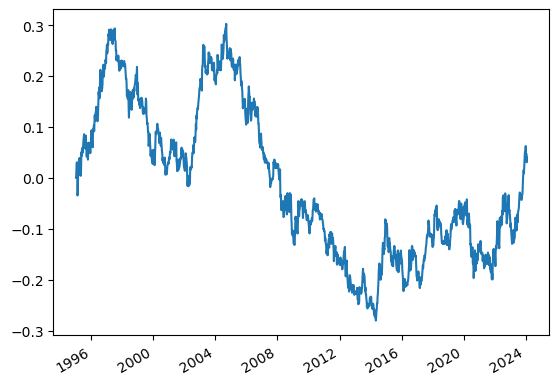

In [377]:
backtestdf2['EqualWeightedReturns'].cumsum().plot()